## Autocorrelaciones

In [1]:
import warnings
warnings.filterwarnings(action="ignore")

%matplotlib inline
from matplotlib.pylab import plt
from matplotlib.pyplot import figure

import pandas as pd
import numpy as np
import math

from statsmodels.tsa import stattools
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%d-%m-%Y')
df = pd.read_csv("Datos/ViajerosTren.csv", sep=";", parse_dates=['fecha'], date_parser=dateparse)
df = df.set_index('fecha')
df = df[['viajeros']]
df['viajeros'] = df['viajeros'].str.replace('.', '').astype(int)
df.head()

,viajeros
fecha,
2019-10-01,165980376
2019-07-01,139321325
2019-04-01,160348073
2019-01-01,161457841
2018-10-01,165269379


Se muestran a continuación las funciones de autocorrelación y de autocorrelación parcial

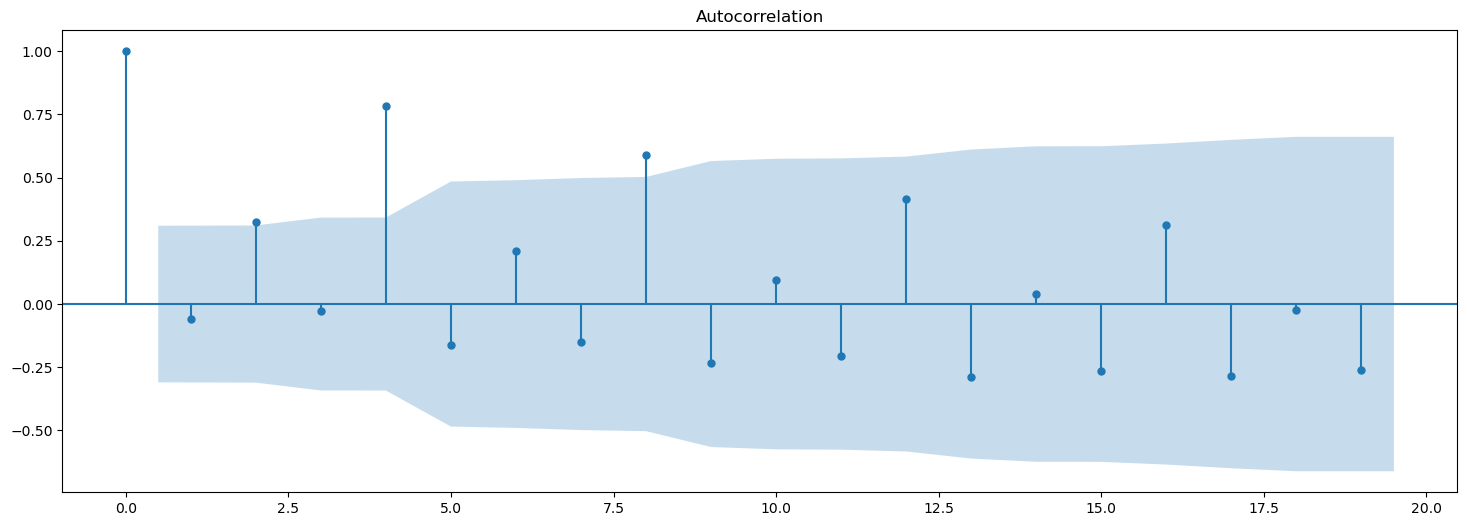

In [3]:
with plt.rc_context():
    plt.rc("figure", figsize=(18,6))
    plot_acf(df, lags=np.round(len(df)/2)-1);

Como ocurría con los pasajeros de avión en el ejemplo de clase, la tendencia en los datos hace que la autocorrelación disminuya gradualmente. Esto ocurre porque, a medida que la serie aumenta, la conexión entre un momento y otro más atrás en el tiempo se vuelve más débil. A pesar de esto, aún podemos ver el patrón estacional en los datos.

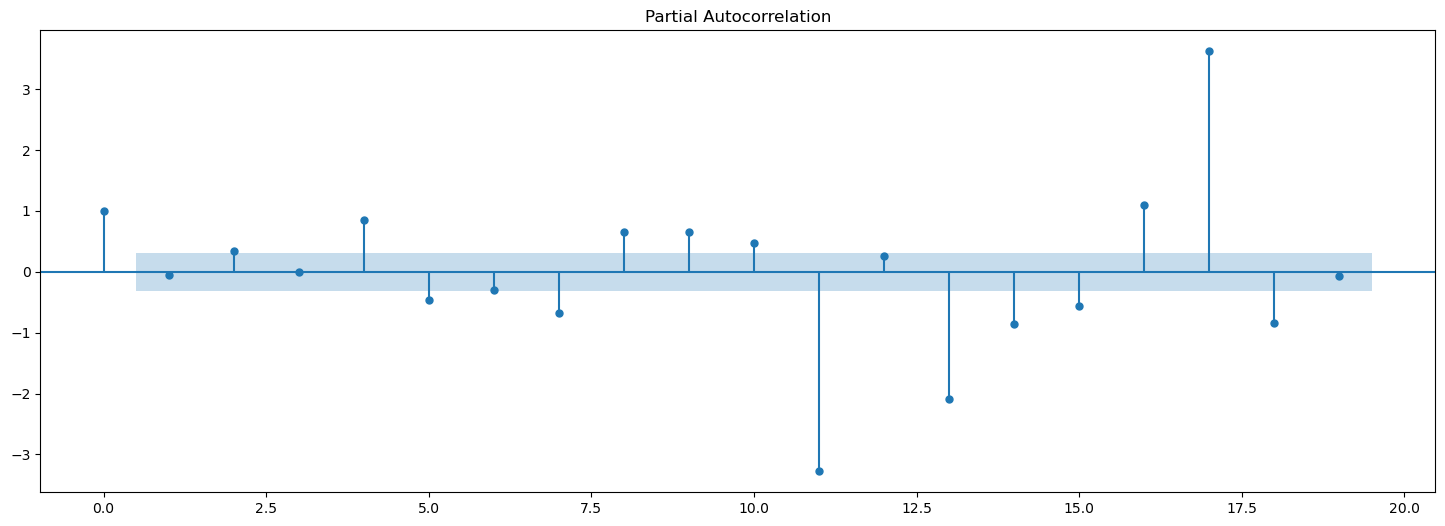

In [5]:
with plt.rc_context():
    plt.rc("figure", figsize=(18,6))
    plot_pacf(df, lags=np.round(len(df)/2)-1);